In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white",color_codes=True)
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9.27)

In [2]:
df = pd.read_excel('char_freq.xlsx')

In [3]:
df.head()

,rank,char,freq,freq_percent,cum_freq_percent,stroke_count
0,1,的,759834,4.8867,4.8867,8
1,2,一,218650,1.4062,6.2929,1
2,3,是,204548,1.3155,7.6084,9
3,4,不,166481,1.0707,8.6791,4
4,5,了,147981,0.9517,9.6308,2


In [4]:
types = []
token = []
tt_ratio = []
for i in range(1,31):
    to = sum(df.freq[df.stroke_count==i])
    ty = len(df.stroke_count[df.stroke_count==i])
    if ty == 0:
        tt_ratio.append(0)
    else:
        tt_ratio.append(to/ty)
    types.append(ty)
    token.append(to)

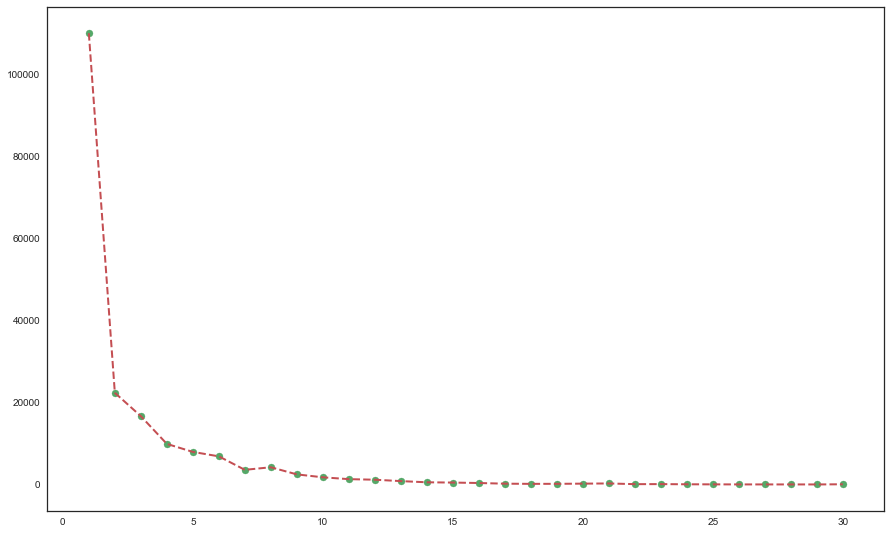

In [34]:
x = np.arange(1,31)
plt.plot(x,tt_ratio,'r--',linewidth=2)
plt.scatter(x,tt_ratio,color='g')

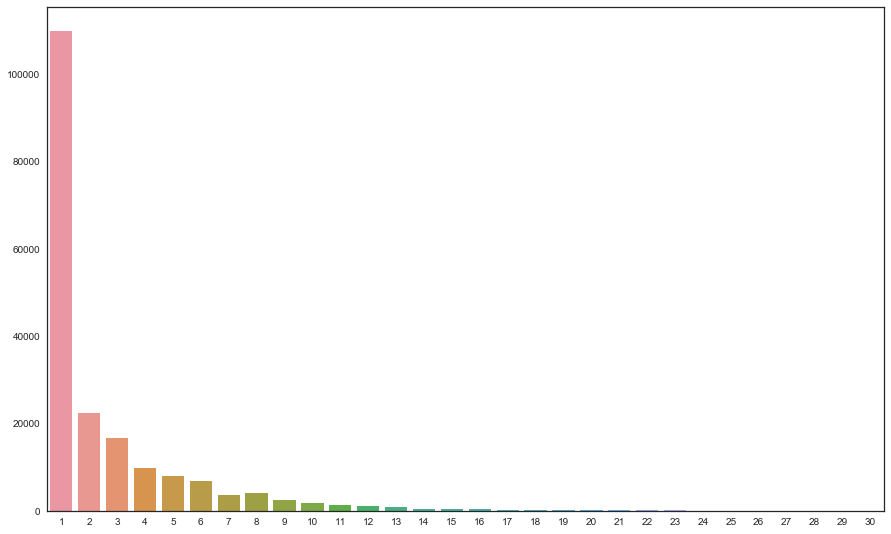

In [29]:
sns.barplot(x,tt_ratio)

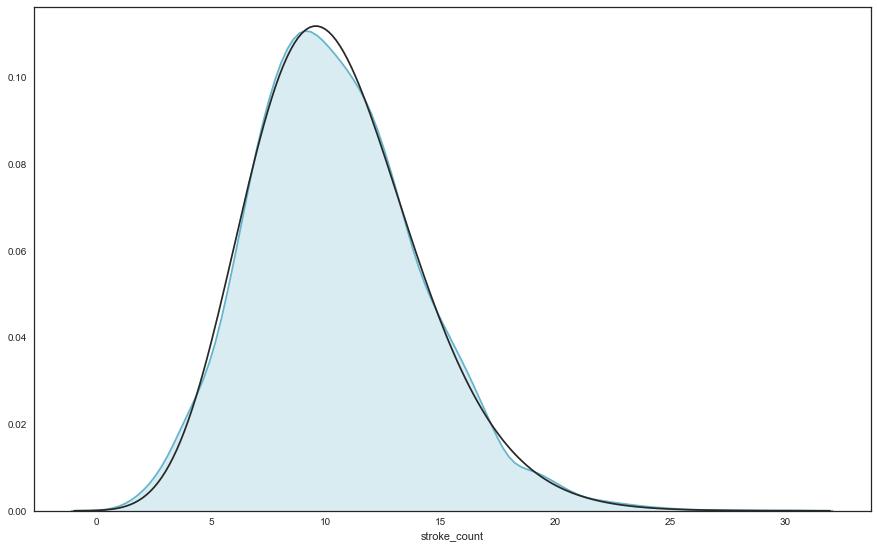

In [10]:
from scipy.stats import norm,gamma
sns.distplot(df.stroke_count,hist=False,kde_kws={"shade": True},fit=gamma,color='c')

In [11]:
sc = pd.read_excel('char_stroke_count.xlsx')
sc.head()

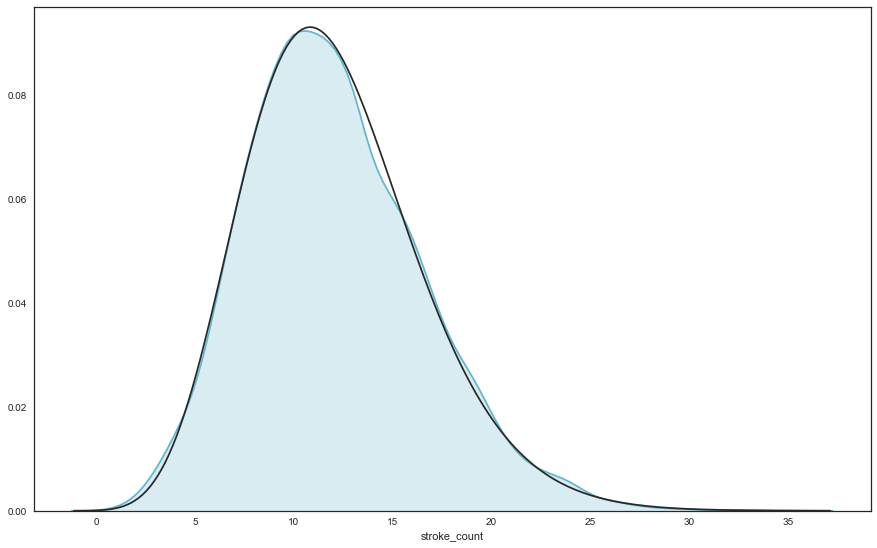

In [13]:
sns.distplot(sc.stroke_count,fit=gamma,hist=False,kde_kws={"shade": True},color='c')

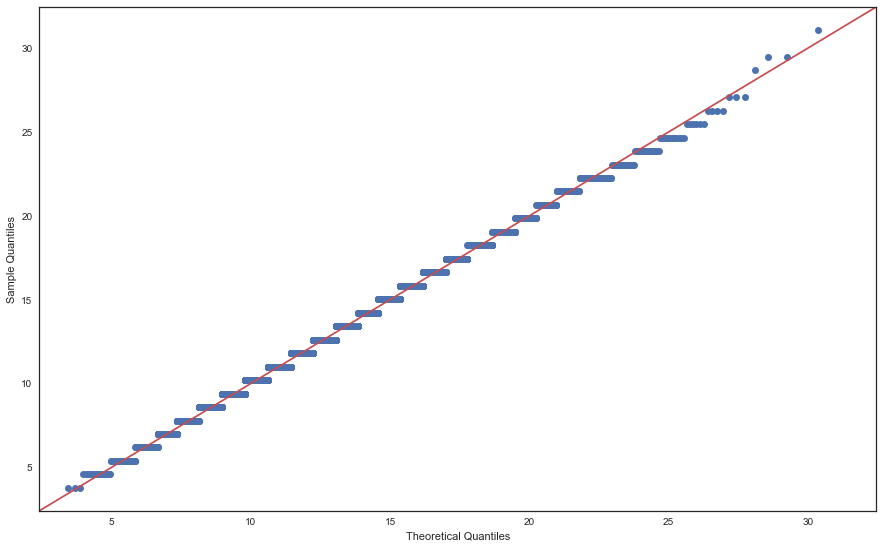

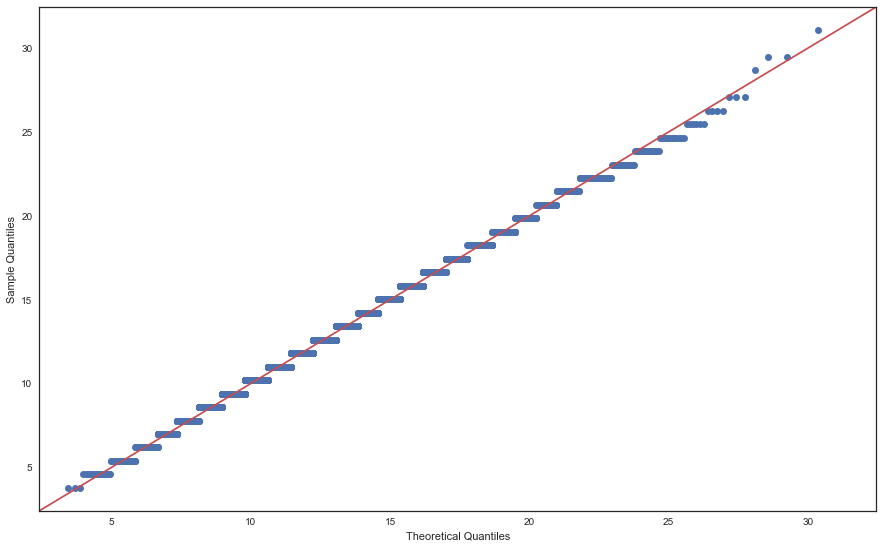

In [14]:
import statsmodels.api as sm
sm.qqplot(sc.stroke_count,gamma,line='45',fit=True)

In [15]:
gamma.fit(sc.stroke_count)

(12.675837679425904, -3.7147906041798997, 1.2454712053612962)

In [16]:
count_pert = []
for i in range(1,36):
    count_pert.append(len(sc.stroke_count[sc.stroke_count==i])/100.)

x = np.arange(1,36)
sns.barplot(x,count_pert)

In [18]:
gamma.pdf(4,12.675837679425904, -3.7147906041798997, 1.2454712053612962)*100

1.3649476541609038